In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#from google.colab import drive
import pandas as pd
#from google.colab.patches import cv2_imshow

In [94]:
pil_im = Image.open('/content/drive/MyDrive/Computer vision/funny-cat-4.jpg')
pil_im2= Image.open('/content/drive/MyDrive/Computer vision/image00049.jpg')

In [2]:
rows, cols = 256 ,256
crow, ccol = rows // 2, cols // 2
radius = 30  # Adjust this parameter to control the cutoff frequency

mask = np.zeros((rows, cols), np.uint8)
cv2.circle(mask, (ccol, crow), radius, 1, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

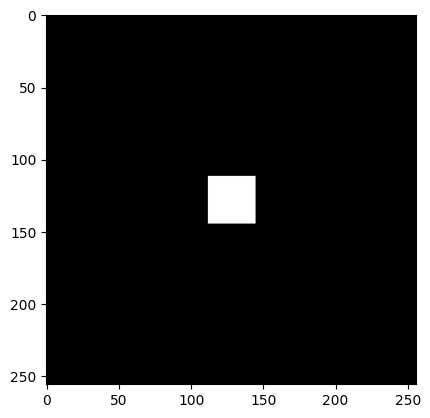

In [96]:
mask1 = np.zeros((256, 256), dtype=np.uint8)
cv2.rectangle(mask1, (112, 112), (144, 144), 1, -1)  # Draw a white rectangle on the black mask

# Show the mask using Matplotlib
plt.imshow(mask1, cmap='gray')
plt.show()

In [115]:
def hybrid(s1,s2):
  # 0pening image5
  image1 = cv2.imread(s1, cv2.IMREAD_GRAYSCALE)
  image2 = cv2.imread(s2, cv2.IMREAD_GRAYSCALE)

  image1 = cv2.resize(image1,(256,256))
  image2 = cv2.resize(image2,(256,256))

  #Converting Images to frequency domain
  image1_transform= np.fft.fft2(image1)
  image2_transform= np.fft.fft2(image2)

  image1_transform_shifted = np.fft.fftshift(image1_transform)
  image2_transform_shifted = np.fft.fftshift(image2_transform)

  rows, cols = 256 ,256
  crow, ccol = rows //2, cols // 2
  radius = 10
  mask = np.zeros((rows, cols), np.uint8)
  cv2.rectangle(mask, (112, 112), (144, 144), 1, -1)
  #cv2.rectangle(mask, (96, 96), (192, 192), 1, -1)

  im1_filtered = image1_transform_shifted*mask
  im2_filtered = image2_transform_shifted*mask




  final1 = np.abs(np.fft.ifft2(np.fft.ifftshift(im1_filtered)))
  #final1 = np.log1p(final1)
  transit = np.abs(np.fft.ifft2(np.fft.ifftshift(im2_filtered)))
  final2 = image2 - (transit)
  np.log1p(final2)

  #final1 = cv2.normalize(final1,None,1,255,cv2.NORM_MINMAX,dtype=float)
  #final1 = cv2.normalize(final2,None,1,255,cv2.NORM_MINMAX,dtype=float)


  plt.subplot(121), plt.imshow(image1, cmap='gray'), plt.title('Original Image1')
  plt.subplot(122), plt.imshow((final1), cmap='gray'), plt.title('LPF Image')
  plt.show()

  plt.subplot(121), plt.imshow(image2, cmap='gray'), plt.title('Original Image2')
  plt.subplot(122), plt.imshow((final2), cmap='gray'), plt.title('HPF Image')
  plt.show()

  plt.subplot(121), plt.imshow((final1+final2)/2, cmap='gray'), plt.title('Hybrid Image')
  plt.subplot(122), plt.imshow(mask, cmap='gray'), plt.title('The Filter')
  plt.show()


  return 0


<ipython-input-115-68824c5d0b6a>:33: RuntimeWarning: invalid value encountered in log1p
  np.log1p(final2)


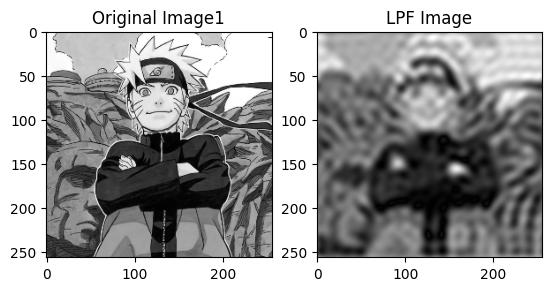

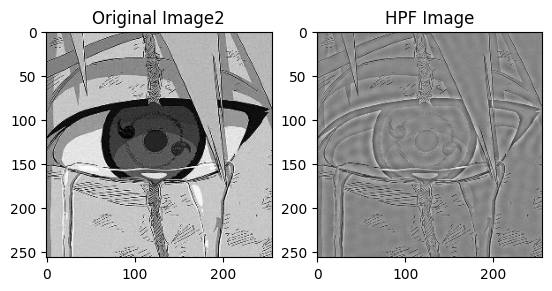

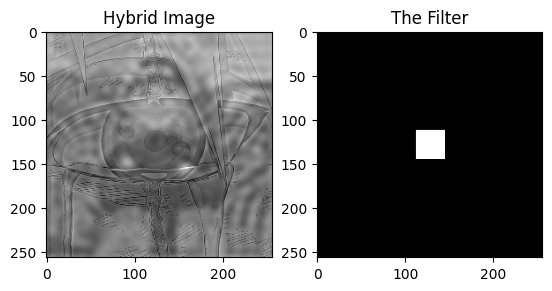

0

In [116]:
hybrid('/content/drive/MyDrive/Computer vision/naruto.jpg','/content/drive/MyDrive/Computer vision/kakashi.jpg')
